In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [10]:
def shuffle_data(x_train,y_train):
    temp_index=np.arange(len(x_train))
    
    np.random.shuffle(temp_index)
    x_temp=np.zeros(x_train.shape)
    y_temp=np.zeros(y_train.shape)
    x_temp=x_train[temp_index]
    y_temp=y_train[temp_index]
    return x_temp,y_temp

No handles with labels found to put in legend.


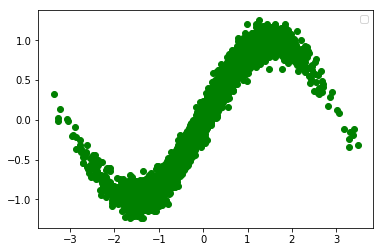

In [4]:
num_points=5000
vectors_set=[]
for i in range(num_points):
    x1=np.random.normal(.0,1.0)
    y1=np.sin(x1)+np.random.normal(0.,0.1)
    vectors_set.append([x1,y1])

x_data=[v[0] for v in vectors_set]
y_data=[v[1] for v in vectors_set]

plt.plot(x_data,y_data,'go')
plt.legend()
plt.show()

In [5]:
batch_size=100
batch_num=int(len(x_data)/batch_size)
x_data=np.reshape(x_data,[len(x_data),1])
y_data=np.reshape(y_data,[len(y_data),1])
input_data=tf.placeholder(tf.float32,shape=[None,1])
output_data=tf.placeholder(tf.float32,shape=[None,1])

In [7]:
W1=tf.Variable(tf.random_uniform([1,5],-1.0,1.0))
W2=tf.Variable(tf.random_uniform([5,3],-1.0,1.0))
W_out=tf.Variable(tf.random_uniform([3,1],-1.0,1.0))
hidden1=tf.nn.sigmoid(tf.matmul(input_data,W1))
hidden2=tf.nn.sigmoid(tf.matmul(hidden1,W2))
output=tf.matmul(hidden2,W_out)

In [8]:
loss=tf.reduce_mean(tf.square(output-output_data))
optimizer=tf.train.AdamOptimizer(0.01)
train=optimizer.minimize(loss)
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [15]:
for step in range(5001):
    index=0
    x_data,y_data=shuffle_data(x_data,y_data)
    for batch_iter in range(batch_num-1):
        feed_dict={input_data:x_data[index:index+batch_size],
                  output_data:y_data[index:index+batch_size]}
        sess.run(train,feed_dict=feed_dict)
        index += batch_size
    if (step%100==0 or (step<100 and step%10==0)):
        print('step=%5d, Loss value = %f'%
             (step,sess.run(loss,feed_dict=feed_dict)))

step=    0, Loss value = 0.017176
step=   10, Loss value = 0.011897
step=   20, Loss value = 0.016628
step=   30, Loss value = 0.025812
step=   40, Loss value = 0.011876
step=   50, Loss value = 0.014065
step=   60, Loss value = 0.016366
step=   70, Loss value = 0.016426
step=   80, Loss value = 0.015217
step=   90, Loss value = 0.012279
step=  100, Loss value = 0.012582
step=  200, Loss value = 0.015445
step=  300, Loss value = 0.039488
step=  400, Loss value = 0.013429
step=  500, Loss value = 0.008793
step=  600, Loss value = 0.016384
step=  700, Loss value = 0.023849
step=  800, Loss value = 0.014850
step=  900, Loss value = 0.020720
step= 1000, Loss value = 0.019435
step= 1100, Loss value = 0.023589
step= 1200, Loss value = 0.011593
step= 1300, Loss value = 0.024278
step= 1400, Loss value = 0.012344
step= 1500, Loss value = 0.015183
step= 1600, Loss value = 0.011601
step= 1700, Loss value = 0.014323
step= 1800, Loss value = 0.018208
step= 1900, Loss value = 0.011814
step= 2000, Lo

No handles with labels found to put in legend.


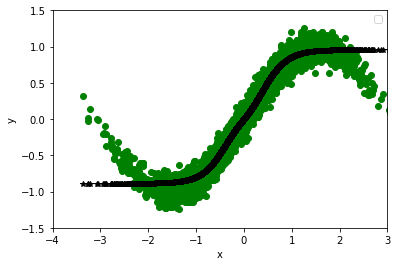

In [21]:
feed_dict={input_data:x_data}
plt.plot(x_data,y_data,'go')
plt.plot(x_data,sess.run(output,feed_dict=feed_dict), 'k*')
plt.xlabel('x')
plt.xlim(-4,3)
plt.ylabel('y')
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()